<a href="https://colab.research.google.com/github/JUANES31081/PORTAFOLIO_/blob/main/Clasificacion_perritos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Creando carpetas para las categorias
!mkdir pug
!mkdir beagle
!mkdir otros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/ZIPS/BEAGLE.zip' '/content/beagle'
!cp '/content/drive/MyDrive/ZIPS/PUG.zip' '/content/pug'
!cp '/content/drive/MyDrive/ZIPS/OTROS.zip' '/content/otros'

In [ ]:
#descomprimiendo en ambas carpetas

%cd beagle
!unzip BEAGLE.zip

%cd ..

%cd pug
!unzip PUG.zip

%cd ..

%cd otros
!unzip OTROS.zip

%cd ..


/content/beagle
Archive:  BEAGLE.zip
  inflating: beagle_1.jpg            
  inflating: beagle_10.jpg           
  inflating: beagle_100.jpg          
  inflating: beagle_101.jpg          
  inflating: beagle_102.jpg          
  inflating: beagle_103.jpg          
  inflating: beagle_104.jpg          
  inflating: beagle_105.jpg          
  inflating: beagle_107.jpg          
  inflating: beagle_108.jpg          
  inflating: beagle_109.jpg          
  inflating: beagle_110.jpg          
  inflating: beagle_111.jpg          
  inflating: beagle_112.jpg          
  inflating: beagle_113.jpg          
  inflating: beagle_114.jpg          
  inflating: beagle_115.jpg          
  inflating: beagle_116.jpg          
  inflating: beagle_117.jpg          
  inflating: beagle_118.jpg          
  inflating: beagle_119.jpg          
  inflating: beagle_12.jpg           
  inflating: beagle_120.jpg          
  inflating: beagle_121.jpg          
  inflating: beagle_122.jpg          
  inflating: 

In [ ]:
#eliminar la basura (ZIP)

!rm -rf  /content/pug/PUG.zip
!rm -rf /content/beagle/BEAGLE.zip
!rm -rf /content/otros/OTROS.zip

In [ ]:
#cuantas imagenes tiene cada carpeta

!ls /content/beagle | wc -l #395
!ls /content/pug | wc -l #400
!ls /content/otros/OTROS | wc -l #400

395
400
498


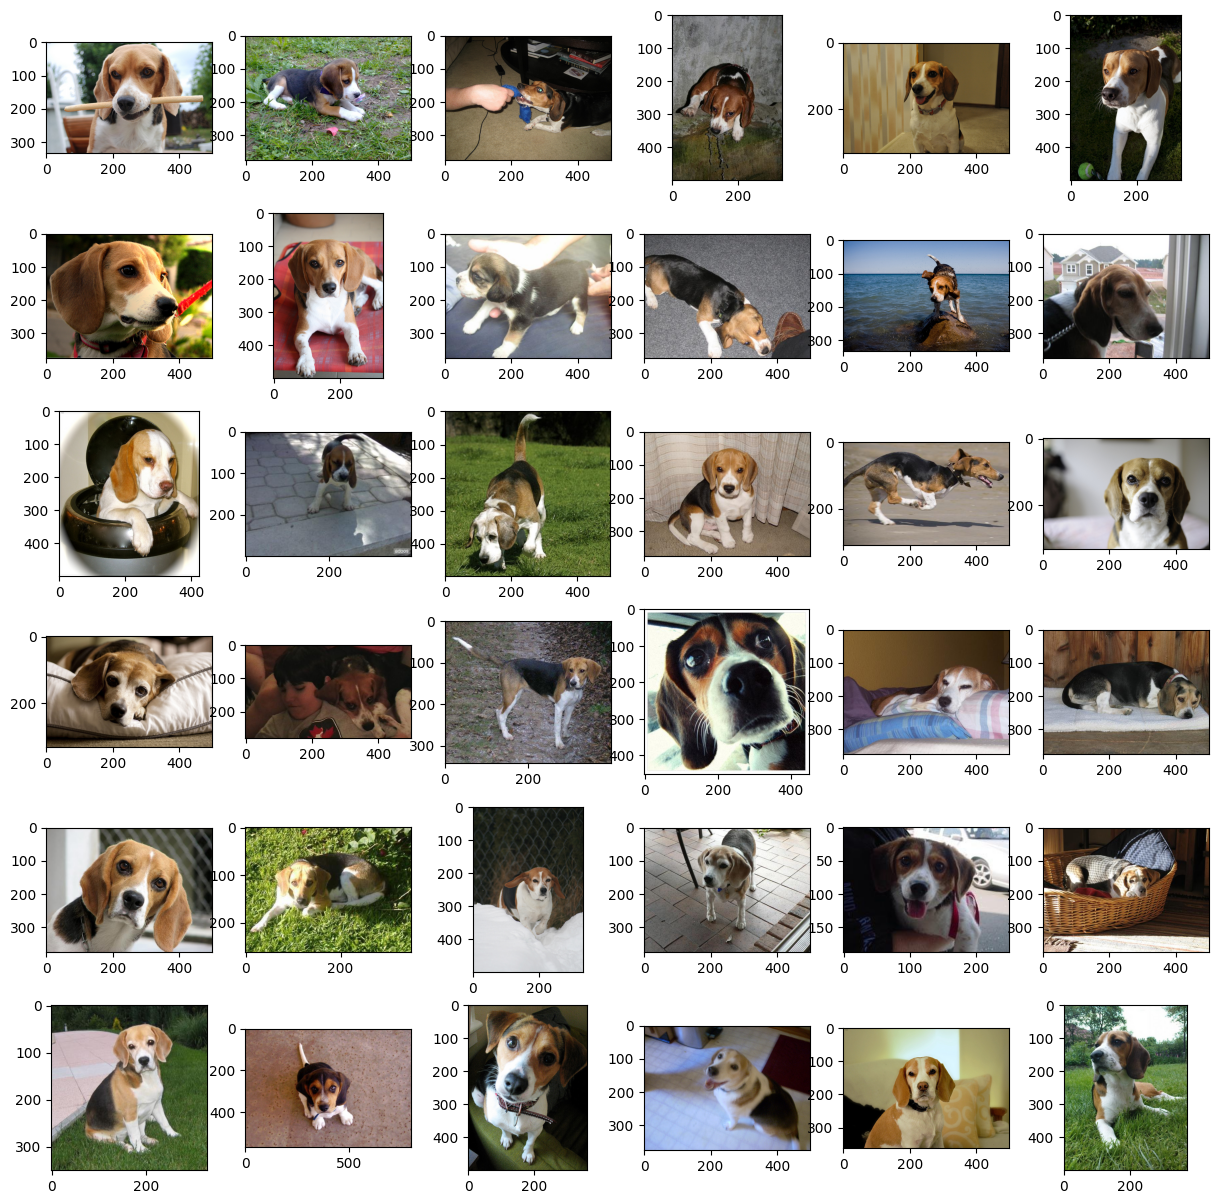

In [ ]:
#ver ejemplos de las imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/beagle'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:36]):
  plt.subplot(6,6,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

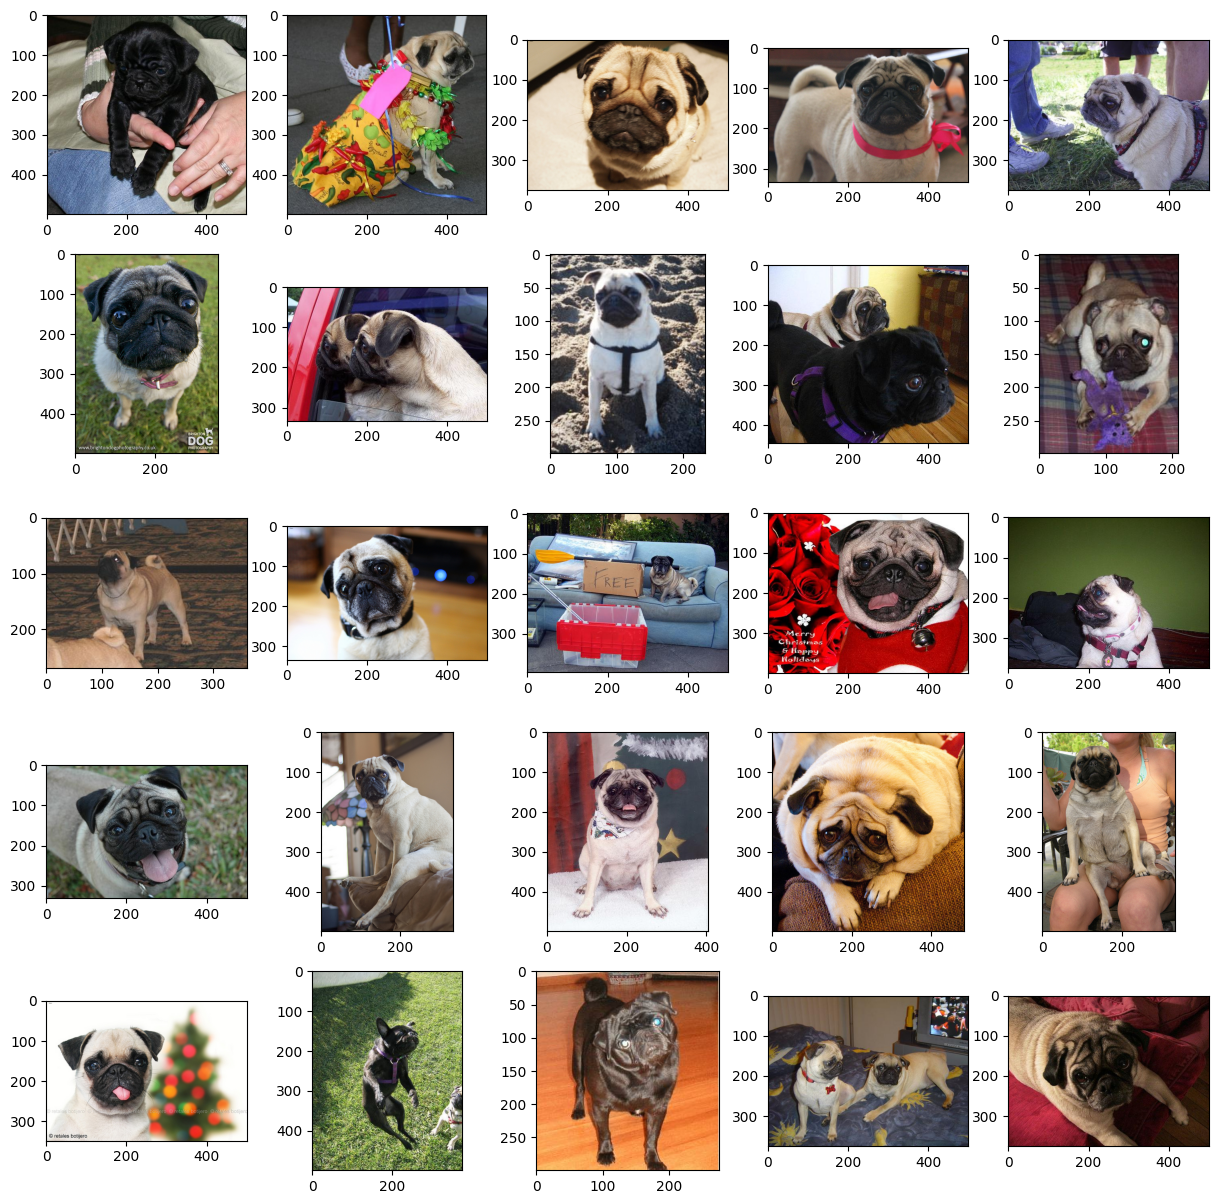

In [ ]:
#ver ejemplos de las imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/pug'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/pug
!mkdir dataset/beagle
!mkdir dataset/otros

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 395 (el num. menor de imagenes que se tiene)

import shutil
carpeta_fuente = '/content/beagle'
carpeta_destino = '/content/dataset/beagle'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 395 (el num. menor de imagenes que se tiene)

import shutil
carpeta_fuente = '/content/pug'
carpeta_destino = '/content/dataset/pug'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/otros/OTROS'
carpeta_destino = '/content/dataset/otros'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/pug/ | wc -l
!ls /content/dataset/beagle | wc -l
!ls /content/dataset/otros | wc -l

395
395
395


Found 903 images belonging to 3 classes.
Found 282 images belonging to 3 classes.


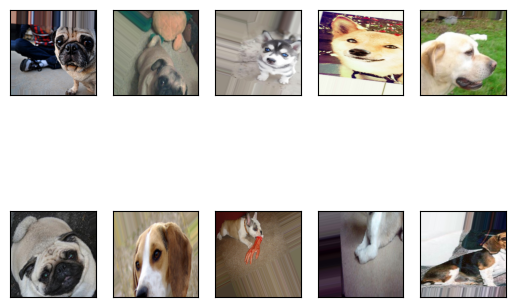

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.24 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=128, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=128, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#importe de mobilenet v2
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
#Creando el modelo
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Resumen del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#Compilar como siempre
learning_rate = 0.29  # aun no se pero menos de 0,1 no sirve
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 20

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=1536, #entre 700 y 1000 puede estar el resultado o un poco menos talvez
    validation_data=data_gen_pruebas
)

Epoch 1/20
8/8 [==============================] - 20s 3s/step - loss: 0.0805 - accuracy: 0.9712 - val_loss: 0.3035 - val_accuracy: 0.8901
Epoch 2/20
8/8 [==============================] - 20s 2s/step - loss: 0.0720 - accuracy: 0.9734 - val_loss: 0.3395 - val_accuracy: 0.8865
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 0.0745 - accuracy: 0.9723 - val_loss: 0.3382 - val_accuracy: 0.8794
Epoch 4/20


KeyboardInterrupt: 

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(20)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet PREDICCION
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizarURL(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

def categorizarIMG(img):
  img = Image.open(img)
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
#Categorizar una imagen de internet PROBABILIDADES
def categorizar1_PURL(url):
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content))
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224, 224))
    #sacar porcentaje
    probabilidades = modelo.predict(img.reshape(-1, 224, 224, 3))[0]
    return probabilidades

def categorizar1_PIMG(img):
    img = Image.open(img)
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224, 224))
    probabilidades = modelo.predict(img.reshape(-1, 224, 224, 3))[0]
    return probabilidades

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Función para capturar una imagen desde la cámara
def take_photo(filename='Foto.jpg', quality=1):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Tomar foto';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Redimensionar el elemento video para adaptarlo al ancho de la celda de salida en Colab
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Esperar a que se haga clic en el botón de captura
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    binary_data = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Capturar una foto y mostrarla
photo = take_photo()
print('Foto tomada:', photo)

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def capture_image(filename='Foto.jpg', quality=1):
    # HTML y JavaScript para la interfaz de usuario
    html_code = '''
    <div>
        <video id="video" autoplay style="display:block; width:100%; max-width:500px;"></video>
        <button id="capture">Tomar foto</button>
        <button id="stop" style="display:none;">Detener cámara</button>
    </div>
    <canvas style="display:none;"></canvas>
    <p id="message"></p>
    '''

    display(HTML(html_code))

    # JavaScript para controlar la cámara y la captura de fotos
    js_code = '''
    const video = document.getElementById('video');
    const captureButton = document.getElementById('capture');
    const stopButton = document.getElementById('stop');
    const canvas = document.querySelector('canvas');
    const ctx = canvas.getContext('2d');
    const message = document.getElementById('message');

    async function setupCamera() {
        const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });
        video.srcObject = stream;
        await video.play();
    }

    setupCamera();

    function takeSnapshot() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
        return canvas.toDataURL('image/jpeg', ''' + str(quality) + ''');
    }

    captureButton.addEventListener('click', async () => {
        const imgData = takeSnapshot();
        const binaryData = atob(imgData.split(',')[1]);
        const dataArray = new Uint8Array(binaryData.length);
        for (let i = 0; i < binaryData.length; i++) {
            dataArray[i] = binaryData.charCodeAt(i);
        }

        // Crear un archivo Blob y guardar la imagen localmente
        const blob = new Blob([dataArray], { type: 'image/jpeg' });
        const url = URL.createObjectURL(blob);

        // Crear un enlace de descarga
        const a = document.createElement('a');
        a.href = url;
        a.download = 'captured.jpg';
        a.style.display = 'none';
        document.body.appendChild(a);
        a.click();
        window.URL.revokeObjectURL(url);

        captureButton.style.display = 'none';
        stopButton.style.display = 'block';
        message.innerText = 'Foto tomada. Haga clic en "Detener cámara" cuando haya terminado.';
    });

    stopButton.addEventListener('click', () => {
        const stream = video.srcObject;
        const tracks = stream.getTracks();
        tracks.forEach(track => track.stop());

        captureButton.style.display = 'block';
        stopButton.style.display = 'none';
        message.innerText = 'Cámara detenida. Puede tomar otra foto si lo desea.';
    });
    '''

    display(Javascript(js_code))

capture_image()

In [ ]:
"""CAMARA CON JS"""
#CAMARA FUNCIONAL ULTIMA VERSION

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import ipywidgets as widgets

# Variables globales para controlar la cámara
use_front_camera = True

# Función para alternar entre las cámaras
def toggle_camera(change):
    global use_front_camera
    use_front_camera = not use_front_camera

# Función para capturar una imagen desde la cámara
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality, useFrontCamera) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            const toggle = document.createElement('button');
            capture.textContent = 'Tomar foto';
            toggle.textContent = 'Cambiar cámara';
            div.appendChild(capture);
            div.appendChild(toggle);

            const video = document.createElement('video');
            video.style.display = 'block';
            const constraints = {
                video: {
                    facingMode: useFrontCamera ? 'user' : 'environment'
                }
            };
            const stream = await navigator.mediaDevices.getUserMedia(constraints);

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Redimensionar el elemento video para adaptarlo al ancho de la celda de salida en Colab
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Esperar a que se haga clic en el botón de captura
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({}, {})'.format(quality, str(use_front_camera).lower()))
    binary_data = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary_data)

    return filename

# Agregar un botón para cambiar de cámara
toggle_button = widgets.Button(description="Cambiar cámara")
toggle_button.on_click(toggle_camera)

# Capturar una foto usando la cámara frontal por defecto
photo = take_photo()
print('Foto tomada:', photo)

# Mostrar el botón de cambio de cámara
display(toggle_button)

<IPython.core.display.Javascript object>

Foto tomada: photo.jpg


Button(description='Cambiar cámara', style=ButtonStyle())

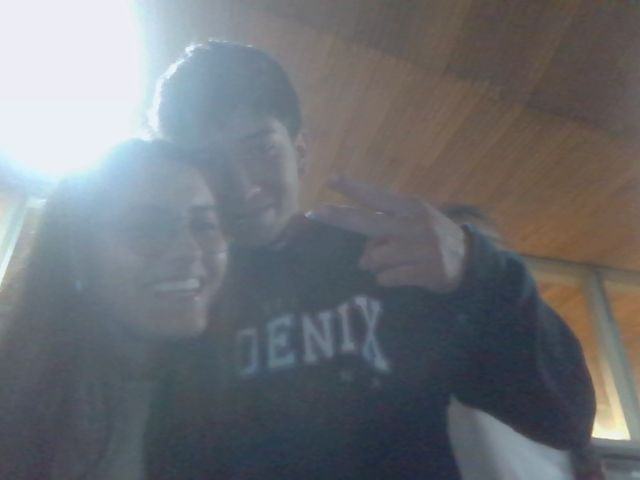

In [ ]:
from PIL import Image
from IPython.display import display

# Cargar la imagen capturada
image = Image.open('photo.jpg')

# Mostrar la imagen
display(image)

In [ ]:
textoB = """
Beagle cachorro:
Para educar un Beagle cachorro, se necesita que se haga por medio de juegos, enseñándole que sus necesidades no se hacen dentro de casa y
usando juguetes cuando quiera morder los muebles. Te podrás comunicar con tu cachorro usando distintos tonos de voz, aullidos o sonidos,
ya que, los cachorros intentan imitar los sonidos.

Necesidades:
• Higiene: Elegir antiparásitos adecuados para el cachorro, una infección puede ser mortal. También es importante la limpieza corporal y dental,
por lo cual, es importante tener un champú y crema dental adecuados, así mismo, la limpieza correcta de los oídos es esencial, para evitar infecciones auditivas.
• Alimentación: Necesita pienso de alta calidad específico para cachorros, saludable y sabroso o una dieta casera adaptada para su edad, actividad, etc. Debe ser
el adecuado para las necesidades nutricionales que tiene con el objetivo de crecer fuerte y sano.
• Cama: Es importante que el cachorro tenga donde dormir, de esta forma, se acostumbrará al espacio. Hay que tener en cuenta que debe tener un poco de intimidad y
 que esté cerca del entorno familiar.
• Comedero y bebedero: Deben ser del tamaño del cachorro. Si no estarás mucho en casa, es importante tener comederos automáticos.
• Paseos: Es esencial tener un arnés y correa para dar paseos con el cachorro, también es necesario un trasportín para las visitas al veterinario. Y finalmente,
se recomienda ponerle un microchip, ya que, es muy funcional en caso de que se pierda.
• Entretenimiento: Hay juguetes especiales para cachorros que son suaves y con los que se le pueden enseñar a comportarse.
• Vacunación: La primera dosis debe ser administrada a los 45 días tras su nacimiento, un refuerzo a los 15-20 días y de nuevo cada 20 o 30 días,
en total 4 dosis. Al medio año se vuelve a dar un refuerzo y, por último, una vez al año durante toda su vida.

Beagle adulto:
Hay que tener en cuenta que lo más común en un Beagle es la infección de oído que puede tener, esto, en los casos más graves, puede provocar sordera.
También es común que padezca de problemas oculares, como cataratas o glaucoma, donde puede perder paulatinamente la visión.
Necesidades:
• Alimentación: las raciones de comida deben ser controladas y necesita hacer ejercicio para no tener sobrepeso. Se recomienda un pienso de alto
contenido en fibra para que regule su tránsito intestinal. Si el animal tiene unos kilos de más, opta por un pienso light, una alimentación con
comida casera enfocada a ayudarle a perder peso de forma sana.
• Ejercicio: Es necesario que haga mucho ejercicio, esto con el fin de que este sano de forma física y mental. Es importante sacarlo 3 veces al día
o hacer salidas largas (1 hora y media), si no tiene mucho espacio dentro de casa
• Higiene: Se debe procurar cepillar su pelaje entre 2 y 3 veces a la semana y que tenga baño una vez al mes. Con relación a las orejas, es importante
revisarlas constantemente y limpiarlas.
• Socialización: Es importante enseñarlo a convivir con otros perros para que tenga una buena socialización. Así mismo, el Beagle es muy apegado a la familia,
por lo que es importante educarlo para que no sienta mucho este vacío, ya que, puede sufrir de ansiedad por el tiempo que permanezca lejos de ti.
• Baños: Durante el baño es muy importante eliminar todo el pelo muerto, por lo que podemos cepillarlos antes del baño y tener especial cuidado con sus oídos,
ya que pueden infectarse si les entra agua, algo muy común por sus orejas grandes.
• Vacunación: Al medio año se da un refuerzo y, por último, una vez al año durante toda su vida.

Beagle Senior – anciano:
Si tienes un perro mayor, es normal que empieces a notar que se está volviendo más lento y menos activo.
Necesidades:
• Alimentación: Se recomienda bajar la cantidad de energía que se suministra a través de la dieta para impedir que tenga sobrepeso. Además, los perros más mayores
reducen su capacidad de sentir el sabor y el aroma de los alimentos, por lo que las comidas sabrosas pueden ser una ventaja incluso para los Beagle.
• Ejercicio: Es importante que tu perro haga ejercicio regularmente para mantenerse saludable. Sin embargo, al ser un perro mayor, es mejor que le proporciones ejercicio
moderado y adaptado a sus necesidades. Puedes darle paseos cortos y suaves o jugar con él en casa con juguetes que no requieran demasiada actividad física.
• Juegos: Es importante hacerle juegos mentales, ya que, los juegos mentales son una excelente manera de estimular la mente de tu perro y mantenerlo activo. Puedes enseñarle
nuevos trucos o jugar a juegos de búsqueda que le permitan utilizar su olfato para encontrar premios.
• Ser constante en las visitas al veterinario.
• Ambiente: El ambiente en que conviven los perros mayores, debe ser cómodo y tranquilo, el animal se debe sentir seguro, también, debe estar limpio.
• Necesita de cuidados más especializados, más atención y mucho cariño.
"""

In [ ]:
textoP = """
Pug cachorro:
Al cuidar a su perro cuando es un bebé, puede prevenir problemas de salud y comportamiento más adelante, haciendo que sus vidas sean más fáciles.

Necesidades:
•	Educación: Los Pugs son una raza especialmente testaruda, y cualquiera que sea el comportamiento que estimules como cachorro, se mantendrá hasta la edad adulta.
•	Higiene: Cada día, limpie suavemente sus pliegues faciales con una almohadilla medicada suave o un hisopo de algodón húmedo y cálido. Esto evita la suciedad y
las bacterias que pueden causar infecciones o enfermar a su cachorro.
•	Comedero: Es importante que estén elevados, ya que, cuando se inclinan a tomar agua o a comer, pueden volcarse y esto puede ser muy peligroso.
•	Temperatura: Son sensibles a la temperatura a cualquier edad, pero cuando son cachorros las temperaturas extremas son un riesgo grave para su salud, pueden tener
dificultad para respirar en lugares cálidos y fríos y son susceptibles a los resfriados y la neumonía cuando no están protegidos de la intemperie helada. Asegúrate de
que tenga un suéter que pueda usar cuando la temperatura baje y si hay calor o humedad, mantenlo en un ambiente con temperatura controlada a menos que tenga que hacer
sus necesidades al aire libre.
•	Paseos: Camina con tu cachorro poniéndole un arnés en lugar de usar un collar. A causa de sus caras planas, los Pugs pueden presentar dificultad para respirar
adecuadamente, por lo que los collares tradicionales representan una amenaza para su salud. Los arneses son preferibles para esta raza.
•	Ejercicio: Deben realizar muchos ejercicios que les permita liberar el estrés y desarrollar sus extremidades. Los primeros años de ejercicios en la vida del Pug
determinaran los últimos años de este.

Pug adulto:
El pug tiene el perfecto comportamiento de un perro de compañía, cariñoso, alegre, vivaz, apegado a su familia. Suelen tener una gran tendencia a llamar la atención,
pero no son excesivamente traviesos.

Necesidades:
•	Cepillado: Cepillar su pelo una o dos veces por semana, para mantener su pelaje sano y brillante, libre de suciedad y pelos muertos.
•	Limpieza: Limpia sus arrugas con un paño húmedo y sécalas a conciencia para evitar la aparición de hongos y otras infecciones cutáneas. El aseo de las orejas del
perro Pug también es esencial. Estamos hablando de perros a los cuales se les acumula suciedad en las orejas con bastante facilidad, por lo menos cada 2 semanas.
•	Paseos: No debemos exigir a los perros de raza Pug un ejercicio muy intenso. Realiza paseos moderados un par de veces al día, complementados con juegos adecuados
dentro o fuera de casa son suficientes para satisfacer las necesidades físicas de nuestro perro Pug.
•	Enfermedades: Conviene destacar su principal problema, el hocico corto, puede afectar negativamente a la salud del Pug. Algunas patologías relacionadas con esto
son problemas respiratorios, paladar elongado, narinas estenóticas, luxación patelar, entropión y enfermedad de Legg-Calve_perthes. Por otro lado, ocasionalmente
presentan casos de epilepsia y también lesiones oculares, esto último debido a sus saltones ojos.

Pug senior – anciano:
Conforme vaya avanzando en su edad podrás apreciar en tu mascota una serie de cambios en su aspecto físico como el cambio en pelaje, se volverá opaco y se caerá
fácilmente, su piel reseca, el hocico se torna de color gris, disminución de energía general, querrá estar más tiempo dormido, rigidez en sus articulaciones,
problemas con su dentadura, disminución auditiva gradual y sus ojos con «niebla», disminución visual.

Necesidades:
•	Hábitos: Trata de mantener sus hábitos en la medida de lo posible, quizá requiera unos ajustes, pero no por ser viejito lo consientas demasiado impidiéndole hacer
cosas que aun pueda hacer.
•	Alimentación: Con la edad tu perrito Pug verá afectada su dentadura, tendrá desgaste e incluso perdida de piezas dentales, en consecuencia, a tu Pug le costará
trabajo masticar sus croquetas duras, un ajuste de dieta será necesario incorporando dieta blanda a su alimentación, claro está recuerda que siempre que realices un
cambio en su dieta, hazlo gradualmente.
•	Movilidad: Conforme aumente su edad quizá tengas que hacer paseos más cortos, aunque con mayor frecuencia; también se cansará más rápidamente, así que será
necesario hacer pequeñas pausas a los paseos. Será recomendable comenzar los paseos a un paso lento, a modo de calentamiento, por unos 10 minutos y luego aumentar el
ritmo, para finalmente disminuir nuevamente el ritmo hasta volver a casa.
•	Higiene: Una de las cosas que les pasas con la edad a los Pug es que su piel se reseca, así que no dudes en consultar con tu veterinario para que te recomiende
alguna crema o suplemento alimenticio que permita mantener su piel en buen estado. Otra situación que ocurre en la piel de los Pug viejitos es que los cuerpos
pilosos se vuelven más débiles y eso ocasiona que el pelo se le caiga más fácilmente, por lo que sería importante mantener rutina de cepillado, aunque por tiempos
más cortos, Hacer más esporádico el baño y Mantener hidratada su piel.
•	Temperatura: Los cambios bruscos de temperatura le pueden afectar, así que procura evitar que tu mascota pase de espacios cálidos a ambientes fríos, sobre todo
en la temporada invernal.

"""

1/1 [==============================] - 0s 32ms/step


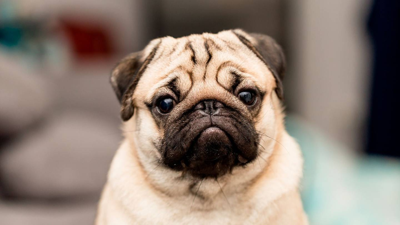

Predicción: 2
Tipo: PUG
Probabilidades en porcentaje:
Prob BEAGLE: 0.00%
Prob OTROS: 0.08%
Prob PUG: 99.91%

Pug cachorro:
Al cuidar a su perro cuando es un bebé, puede prevenir problemas de salud y comportamiento más adelante, haciendo que sus vidas sean más fáciles.

Necesidades:
•	Educación: Los Pugs son una raza especialmente testaruda, y cualquiera que sea el comportamiento que estimules como cachorro, se mantendrá hasta la edad adulta.
•	Higiene: Cada día, limpie suavemente sus pliegues faciales con una almohadilla medicada suave o un hisopo de algodón húmedo y cálido. Esto evita la suciedad y
las bacterias que pueden causar infecciones o enfermar a su cachorro.
•	Comedero: Es importante que estén elevados, ya que, cuando se inclinan a tomar agua o a comer, pueden volcarse y esto puede ser muy peligroso.
•	Temperatura: Son sensibles a la temperatura a cualquier edad, pero cuando son cachorros las temperaturas extremas son un riesgo grave para su salud, pueden tener
dificultad par

In [ ]:
#0 = beagle, 1 = otros, 2 = pug
#prediccion IMAGEN url
url = 'https://www.elfinanciero.com.mx/resizer/D9N419lRzyUG0wM4u-LFRx4zoBk=/1440x810/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/elfinanciero/ELE6TQ3K6BFTZPLZ3VPRCOXKPE.jpeg' #debe ser 1
prediccion = categorizarURL(url)
probabilidades = categorizar1_PURL(url)
tipo = ""

probabilidades_porcentuales = [p * 100 for p in probabilidades]
probabilidades_formateadas = [f"{p:.2f}%" for p in probabilidades_porcentuales]

response = requests.get(url, stream=True)
img = Image.open(response.raw)

nuevo_ancho = 400
img_redimensionada = img.resize((nuevo_ancho, int(img.height * (nuevo_ancho / img.width))))

display(img_redimensionada)


#Resultado predicho
if prediccion==0:
  tipo= "BEAGLE"
elif prediccion==2:
  tipo = "PUG"
elif prediccion==1:
  tipo = "OTROS"

tipos=["BEAGLE","OTROS","PUG"]

print("Predicción:", prediccion)
print("Tipo:", tipo)
print("Probabilidades en porcentaje:")
for clase, probabilidad in enumerate(probabilidades_formateadas):
    print(f"Prob {tipos[clase]}: {probabilidad}")

if prediccion==0:
  print(textoB)
elif prediccion==2:
  print(textoP)
elif prediccion==1:
  print("No se tienen los cuidados para esta raza/animal/objeto por el momento")

1/1 [==============================] - 0s 24ms/step


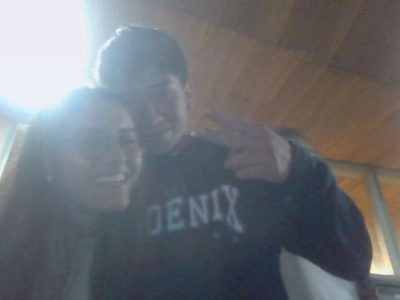

Predicción: 1
Tipo: OTROS
Prob BEAGLE: 36.12%
Prob OTROS: 51.90%
Prob PUG: 11.98%
No se tienen los cuidados para esta raza/animal por el momento


In [ ]:
#prediccion IMAGEN local
img = ("photo.jpg")
prediccion = categorizarIMG(img)
probabilidades = categorizar1_PIMG(img)
tipo = ""

probabilidades_porcentuales = [p * 100 for p in probabilidades]
probabilidades_formateadas = [f"{p:.2f}%" for p in probabilidades_porcentuales]

# Cargar la imagen capturada
image = Image.open(img)
nuevo_ancho = 400
img_redimensionada = image.resize((nuevo_ancho, int(image.height * (nuevo_ancho / image.width))))

display(img_redimensionada)

#Resultado predicho
if prediccion==0:
  tipo= "BEAGLE"
elif prediccion==2:
  tipo = "PUG"
elif prediccion==1:
  tipo = "OTROS"

tipos=["BEAGLE","OTROS","PUG"]

print("Predicción:", prediccion)
print("Tipo:", tipo)
for clase, probabilidad in enumerate(probabilidades_formateadas):
    print(f"Prob {tipos[clase]}: {probabilidad}")

if prediccion==0:
  print(textoB)
elif prediccion==2:
  print(textoP)
elif prediccion==1:
  print("No se tienen los cuidados para esta raza/animal por el momento")

In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_perritos/1

In [ ]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_perritos/1')

In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_perritos.zip /content/carpeta_salida/modelo_perritos/

In [ ]:
#Exportar el modelo en formato h5
modelo.save('perritos.h5')

In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras perritos.h5 carpeta_salida

In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_perritos_TrF.zip /content/carpeta_salida/